# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [3]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.4'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [4]:
from keras import Sequential
from keras.layers import Dense, Activation

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [1]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [2]:
import numpy as np
np.__version__

'1.15.4'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [5]:
#########################코드########################
white_wine=pd.read_csv('C:\\Users\\82109\\Desktop\\PPT\\wine data\\winequality-white.csv',sep=',',dtype='unicode')
red_wine=pd.read_csv('C:\\Users\\82109\\Desktop\\PPT\\wine data\\winequality-red.csv',sep=',',dtype='unicode')

white_wine.dtypes
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
5,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38,121,0.99074,3.24,0.46,10.6,6
4892,6.5,0.23,0.38,1.3,0.032,29,112,0.99298,3.29,0.54,9.7,5


### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [6]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
def preprocess(df):
    Scaler=StandardScaler()
    data=df.iloc[:,:-1]
    qual=df.iloc[:,-1]
    Scaler.fit(data)
    df=Scaler.transform(data)
    df=pd.DataFrame(df)
    qual=pd.DataFrame(qual)
    df=pd.concat([df,qual],axis=1)
    return df
    
display(preprocess(white_wine))
#display(white_wine)
preprocess(white_wine)

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\82109\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys


,0,1,2,3,4,5,6,7,8,9,10,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
5,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
6,-0.776015,0.414339,-1.439511,0.120000,-0.035355,-0.312141,-0.055553,0.291789,-0.054751,-0.173921,-0.743008,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,-1.368585,-0.677101,-0.117278,-1.082790,-0.355784,0.158298,-0.408546,-1.099236,0.342639,-0.261553,0.069674,6
4892,-0.420473,-0.478657,0.378559,-1.003919,-0.630437,-0.370946,-0.620342,-0.350223,0.673797,0.439499,-0.661739,5


C:\Users\82109\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\82109\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys


,0,1,2,3,4,5,6,7,8,9,10,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
5,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
6,-0.776015,0.414339,-1.439511,0.120000,-0.035355,-0.312141,-0.055553,0.291789,-0.054751,-0.173921,-0.743008,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,-1.368585,-0.677101,-0.117278,-1.082790,-0.355784,0.158298,-0.408546,-1.099236,0.342639,-0.261553,0.069674,6
4892,-0.420473,-0.478657,0.378559,-1.003919,-0.630437,-0.370946,-0.620342,-0.350223,0.673797,0.439499,-0.661739,5


In [7]:
display(preprocess(red_wine))
preprocess(red_wine)

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\82109\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys


,0,1,2,3,4,5,6,7,8,9,10,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466240,-0.379145,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872555,0.624333,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083727,0.229023,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107529,0.411474,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466240,-0.379145,0.558274,1.288643,-0.579207,-0.960246,5
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274984,-0.196694,0.558274,1.288643,-0.579207,-0.960246,5
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083727,0.381066,-0.183745,-0.072005,-1.169337,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255068,-0.196694,-0.533554,0.705508,0.542042,0.541630,6
1593,-0.873078,0.514959,-0.980669,-0.453218,-0.413736,1.159440,-0.257511,-0.125443,0.705508,0.955133,-0.866379,6


C:\Users\82109\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\82109\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys


,0,1,2,3,4,5,6,7,8,9,10,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466240,-0.379145,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872555,0.624333,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083727,0.229023,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107529,0.411474,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466240,-0.379145,0.558274,1.288643,-0.579207,-0.960246,5
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274984,-0.196694,0.558274,1.288643,-0.579207,-0.960246,5
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083727,0.381066,-0.183745,-0.072005,-1.169337,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255068,-0.196694,-0.533554,0.705508,0.542042,0.541630,6
1593,-0.873078,0.514959,-0.980669,-0.453218,-0.413736,1.159440,-0.257511,-0.125443,0.705508,0.955133,-0.866379,6


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [8]:
#####################################################
#from sklearn.preprocessing import LabelEncoder
def generate_data(df, t_r):
    x_data=df.iloc[:,:-1]
    y_data=df.iloc[:,-1]
    X_train=x_data.sample(frac=t_r,random_state=0)#random_state=seed
    Y_train=y_data.sample(frac=t_r,random_state=0)#random_state=seed
    X_test=x_data.drop(X_train.index)
    Y_test=y_data.drop(Y_train.index)
    Y_train=keras.utils.to_categorical(Y_train,num_classes=None)
    Y_test=keras.utils.to_categorical(Y_test,num_classes=None)
    return X_train.values, Y_train, X_test.values, Y_test

#####################################################

In [9]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

Epoch 1/300
3429/3429 [==============================] - 2s 490us/step - loss: 3.4178 - acc: 0.2313
Epoch 2/300
3429/3429 [==============================] - 0s 60us/step - loss: 1.5398 - acc: 0.4316
Epoch 3/300
3429/3429 [==============================] - 0s 49us/step - loss: 1.3363 - acc: 0.4436
Epoch 4/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.3021 - acc: 0.4372
Epoch 5/300
3429/3429 [==============================] - 0s 48us/step - loss: 1.2748 - acc: 0.4401
Epoch 6/300
3429/3429 [==============================] - 0s 53us/step - loss: 1.2660 - acc: 0.4386
Epoch 7/300
3429/3429 [==============================] - 0s 63us/step - loss: 1.2632 - acc: 0.4497
Epoch 8/300
3429/3429 [==============================] - 0s 56us/step - loss: 1.2616 - acc: 0.4459
Epoch 9/300
3429/3429 [==============================] - 0s 54us/step - loss: 1.2482 - acc: 0.4517
Epoch 10/300
3429/3429 [==============================] - 0s 52us/step - loss: 1.2460 - acc: 0.4351
Epoch 11

3429/3429 [==============================] - 0s 53us/step - loss: 1.1189 - acc: 0.5019
Epoch 83/300
3429/3429 [==============================] - 0s 45us/step - loss: 1.1170 - acc: 0.5051
Epoch 84/300
3429/3429 [==============================] - 0s 44us/step - loss: 1.1176 - acc: 0.5019
Epoch 85/300
3429/3429 [==============================] - 0s 47us/step - loss: 1.1148 - acc: 0.5051
Epoch 86/300
3429/3429 [==============================] - 0s 48us/step - loss: 1.1223 - acc: 0.5080
Epoch 87/300
3429/3429 [==============================] - 0s 85us/step - loss: 1.1190 - acc: 0.4931
Epoch 88/300
3429/3429 [==============================] - 0s 55us/step - loss: 1.1149 - acc: 0.4975
Epoch 89/300
3429/3429 [==============================] - 0s 39us/step - loss: 1.1158 - acc: 0.5086
Epoch 90/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.1116 - acc: 0.5010
Epoch 91/300
3429/3429 [==============================] - 0s 54us/step - loss: 1.1204 - acc: 0.4966
Epoch 92/300


3429/3429 [==============================] - 0s 49us/step - loss: 1.0818 - acc: 0.5179
Epoch 164/300
3429/3429 [==============================] - 0s 48us/step - loss: 1.0766 - acc: 0.5176
Epoch 165/300
3429/3429 [==============================] - 0s 51us/step - loss: 1.0764 - acc: 0.5147
Epoch 166/300
3429/3429 [==============================] - 0s 52us/step - loss: 1.0831 - acc: 0.5174
Epoch 167/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.0775 - acc: 0.5220
Epoch 168/300
3429/3429 [==============================] - 0s 49us/step - loss: 1.0746 - acc: 0.5244
Epoch 169/300
3429/3429 [==============================] - 0s 51us/step - loss: 1.0753 - acc: 0.5188
Epoch 170/300
3429/3429 [==============================] - 0s 49us/step - loss: 1.0752 - acc: 0.5206
Epoch 171/300
3429/3429 [==============================] - 0s 56us/step - loss: 1.0782 - acc: 0.5244
Epoch 172/300
3429/3429 [==============================] - 0s 47us/step - loss: 1.0659 - acc: 0.5276
Epoc

3429/3429 [==============================] - 0s 44us/step - loss: 1.0526 - acc: 0.5319
Epoch 245/300
3429/3429 [==============================] - 0s 56us/step - loss: 1.0572 - acc: 0.5322
Epoch 246/300
3429/3429 [==============================] - 0s 59us/step - loss: 1.0536 - acc: 0.5311
Epoch 247/300
3429/3429 [==============================] - 0s 63us/step - loss: 1.0563 - acc: 0.5284
Epoch 248/300
3429/3429 [==============================] - 0s 59us/step - loss: 1.0555 - acc: 0.5346
Epoch 249/300
3429/3429 [==============================] - 0s 61us/step - loss: 1.0522 - acc: 0.5340
Epoch 250/300
3429/3429 [==============================] - 0s 58us/step - loss: 1.0546 - acc: 0.5319
Epoch 251/300
3429/3429 [==============================] - 0s 65us/step - loss: 1.0607 - acc: 0.5279
Epoch 252/300
3429/3429 [==============================] - 0s 95us/step - loss: 1.0511 - acc: 0.5395
Epoch 253/300
3429/3429 [==============================] - 0s 86us/step - loss: 1.0567 - acc: 0.5270
Epoc

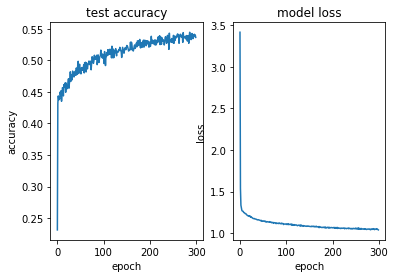

test
eveluate loss:1.0990839318972692, evaluate acc:0.537780803145804
Epoch 1/300
3429/3429 [==============================] - 2s 554us/step - loss: 3.6553 - acc: 0.3587
Epoch 2/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.4260 - acc: 0.3715
Epoch 3/300
3429/3429 [==============================] - 0s 94us/step - loss: 1.3551 - acc: 0.3969
Epoch 4/300
3429/3429 [==============================] - 0s 66us/step - loss: 1.3446 - acc: 0.4089
Epoch 5/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.3166 - acc: 0.4042
Epoch 6/300
3429/3429 [==============================] - 0s 75us/step - loss: 1.3095 - acc: 0.4185
Epoch 7/300
3429/3429 [==============================] - 0s 47us/step - loss: 1.2990 - acc: 0.4243
Epoch 8/300
3429/3429 [==============================] - 0s 43us/step - loss: 1.2836 - acc: 0.4313
Epoch 9/300
3429/3429 [==============================] - 0s 48us/step - loss: 1.2729 - acc: 0.4380
Epoch 10/300
3429/3429 [==============

3429/3429 [==============================] - 0s 51us/step - loss: 1.1199 - acc: 0.4987
Epoch 82/300
3429/3429 [==============================] - 0s 48us/step - loss: 1.1136 - acc: 0.4981
Epoch 83/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.1157 - acc: 0.5063
Epoch 84/300
3429/3429 [==============================] - 0s 64us/step - loss: 1.1168 - acc: 0.4990
Epoch 85/300
3429/3429 [==============================] - 0s 67us/step - loss: 1.1095 - acc: 0.5054
Epoch 86/300
3429/3429 [==============================] - 0s 45us/step - loss: 1.1164 - acc: 0.4937
Epoch 87/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.1128 - acc: 0.5083
Epoch 88/300
3429/3429 [==============================] - 0s 49us/step - loss: 1.1092 - acc: 0.5124
Epoch 89/300
3429/3429 [==============================] - 0s 52us/step - loss: 1.1102 - acc: 0.5004
Epoch 90/300
3429/3429 [==============================] - 0s 46us/step - loss: 1.1147 - acc: 0.5013
Epoch 91/300


3429/3429 [==============================] - 0s 46us/step - loss: 1.0782 - acc: 0.5150
Epoch 163/300
3429/3429 [==============================] - 0s 49us/step - loss: 1.0783 - acc: 0.5232
Epoch 164/300
3429/3429 [==============================] - 0s 52us/step - loss: 1.0750 - acc: 0.5185
Epoch 165/300
3429/3429 [==============================] - 0s 46us/step - loss: 1.0809 - acc: 0.5185
Epoch 166/300
3429/3429 [==============================] - 0s 64us/step - loss: 1.0779 - acc: 0.5106
Epoch 167/300
3429/3429 [==============================] - 0s 58us/step - loss: 1.0798 - acc: 0.5121
Epoch 168/300
3429/3429 [==============================] - 0s 63us/step - loss: 1.0771 - acc: 0.5130
Epoch 169/300
3429/3429 [==============================] - 0s 63us/step - loss: 1.0681 - acc: 0.5136
Epoch 170/300
3429/3429 [==============================] - 0s 63us/step - loss: 1.0745 - acc: 0.5185
Epoch 171/300
3429/3429 [==============================] - 0s 73us/step - loss: 1.0810 - acc: 0.5121
Epoc

Epoch 243/300
3429/3429 [==============================] - 0s 52us/step - loss: 1.0531 - acc: 0.5194
Epoch 244/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.0533 - acc: 0.5273
Epoch 245/300
3429/3429 [==============================] - 0s 63us/step - loss: 1.0519 - acc: 0.5346
Epoch 246/300
3429/3429 [==============================] - 0s 72us/step - loss: 1.0533 - acc: 0.5279
Epoch 247/300
3429/3429 [==============================] - 0s 52us/step - loss: 1.0497 - acc: 0.5372
Epoch 248/300
3429/3429 [==============================] - 0s 50us/step - loss: 1.0494 - acc: 0.5308
Epoch 249/300
3429/3429 [==============================] - 0s 55us/step - loss: 1.0541 - acc: 0.5375
Epoch 250/300
3429/3429 [==============================] - 0s 53us/step - loss: 1.0502 - acc: 0.5363
Epoch 251/300
3429/3429 [==============================] - 0s 49us/step - loss: 1.0491 - acc: 0.5264
Epoch 252/300
3429/3429 [==============================] - 0s 49us/step - loss: 1.0507 - ac

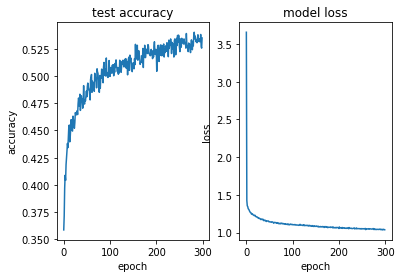

test
eveluate loss:1.2187235569613089, evaluate acc:0.47106875384884517
(1119, 9)
Epoch 1/250
1119/1119 [==============================] - 2s 1ms/step - loss: 4.9291 - acc: 0.1555  
Epoch 2/250
1119/1119 [==============================] - 0s 39us/step - loss: 1.5188 - acc: 0.4879
Epoch 3/250
1119/1119 [==============================] - 0s 51us/step - loss: 1.2933 - acc: 0.5040
Epoch 4/250
1119/1119 [==============================] - 0s 44us/step - loss: 1.2121 - acc: 0.5085
Epoch 5/250
1119/1119 [==============================] - 0s 48us/step - loss: 1.1721 - acc: 0.5156
Epoch 6/250
1119/1119 [==============================] - 0s 46us/step - loss: 1.1537 - acc: 0.4978
Epoch 7/250
1119/1119 [==============================] - 0s 54us/step - loss: 1.1495 - acc: 0.5013
Epoch 8/250
1119/1119 [==============================] - 0s 57us/step - loss: 1.1378 - acc: 0.5228
Epoch 9/250
1119/1119 [==============================] - 0s 58us/step - loss: 1.1419 - acc: 0.5201
Epoch 10/250
1119/1119 [==

1119/1119 [==============================] - 0s 57us/step - loss: 1.0077 - acc: 0.5836
Epoch 83/250
1119/1119 [==============================] - 0s 56us/step - loss: 1.0135 - acc: 0.5737
Epoch 84/250
1119/1119 [==============================] - 0s 55us/step - loss: 0.9969 - acc: 0.5871
Epoch 85/250
1119/1119 [==============================] - 0s 50us/step - loss: 0.9959 - acc: 0.5818
Epoch 86/250
1119/1119 [==============================] - 0s 44us/step - loss: 0.9995 - acc: 0.5621
Epoch 87/250
1119/1119 [==============================] - 0s 46us/step - loss: 0.9962 - acc: 0.5746
Epoch 88/250
1119/1119 [==============================] - 0s 43us/step - loss: 0.9888 - acc: 0.5728
Epoch 89/250
1119/1119 [==============================] - 0s 48us/step - loss: 0.9956 - acc: 0.5755
Epoch 90/250
1119/1119 [==============================] - 0s 48us/step - loss: 0.9839 - acc: 0.5773
Epoch 91/250
1119/1119 [==============================] - ETA: 0s - loss: 0.9965 - acc: 0.573 - 0s 59us/step - lo

1119/1119 [==============================] - 0s 59us/step - loss: 0.9517 - acc: 0.5845
Epoch 164/250
1119/1119 [==============================] - 0s 57us/step - loss: 0.9356 - acc: 0.6005
Epoch 165/250
1119/1119 [==============================] - 0s 52us/step - loss: 0.9411 - acc: 0.5853
Epoch 166/250
1119/1119 [==============================] - 0s 54us/step - loss: 0.9343 - acc: 0.6086
Epoch 167/250
1119/1119 [==============================] - 0s 51us/step - loss: 0.9359 - acc: 0.5943
Epoch 168/250
1119/1119 [==============================] - 0s 44us/step - loss: 0.9384 - acc: 0.6122
Epoch 169/250
1119/1119 [==============================] - 0s 47us/step - loss: 0.9335 - acc: 0.5943
Epoch 170/250
1119/1119 [==============================] - 0s 50us/step - loss: 0.9357 - acc: 0.5836
Epoch 171/250
1119/1119 [==============================] - 0s 45us/step - loss: 0.9197 - acc: 0.6139
Epoch 172/250
1119/1119 [==============================] - 0s 48us/step - loss: 0.9504 - acc: 0.6050
Epoc

1119/1119 [==============================] - 0s 47us/step - loss: 0.9081 - acc: 0.5996
Epoch 245/250
1119/1119 [==============================] - 0s 46us/step - loss: 0.9014 - acc: 0.6193
Epoch 246/250
1119/1119 [==============================] - 0s 45us/step - loss: 0.9018 - acc: 0.6273
Epoch 247/250
1119/1119 [==============================] - 0s 48us/step - loss: 0.8961 - acc: 0.6148
Epoch 248/250
1119/1119 [==============================] - 0s 49us/step - loss: 0.9037 - acc: 0.6184
Epoch 249/250
1119/1119 [==============================] - 0s 47us/step - loss: 0.8963 - acc: 0.6157
Epoch 250/250
1119/1119 [==============================] - 0s 50us/step - loss: 0.8992 - acc: 0.6175


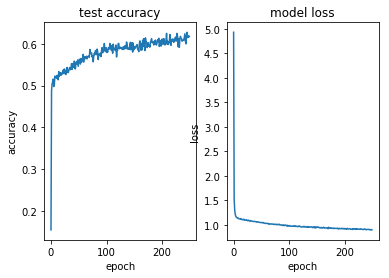

test
eveluate loss:0.9662708083788554, evaluate acc:0.6020833333333333


In [18]:
###########################################################
import matplotlib.pyplot as plt
##rmsprop<-adam 성능 증가#lr=0.001로 하니 너무 느리게 수렴->0.01로 하면 너무 ㅐ
class whwinemodel(object):#,node,opt,loss,learn,act
    def __init__(self):
        self.model=Sequential()
    def construct(self):
        self.model.add(Dense(32,activation='relu',input_dim=11)) 
        self.model.add(Dense(25,activation='relu'))
        self.model.add(Dense(20,activation='relu'))
        self.model.add(Dense(10,activation='softmax'))
        sgd=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-8, decay=0.0)  
        self.model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])#adam,rmsprop각각
    def fit(self):
        self.history=self.model.fit(x_train,y_train,epochs=300,batch_size=64,verbose=1)#validationset만드든것 성능 비교
        
    def printkey(self):
        print(self.history.history.keys())
        
    def figure(self):
        fig=plt.figure()
        ax1=fig.add_subplot(1,2,1)
        plt.plot(self.history.history['acc'])
        plt.title('test accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        ax2=fig.add_subplot(1,2,2)
        plt.plot(self.history.history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()
        
    def evaluate(self):
        score = self.model.evaluate(x_train, y_train, verbose=0)
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
    def test(self):
        score = self.model.evaluate(x_test, y_test, verbose=0)
        print("test")
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
firstmodel=whwinemodel()
firstmodel.construct()
firstmodel.fit()
firstmodel.figure()
firstmodel.test()



class redwinemodel(object):#,node,opt,loss,learn,act
    def __init__(self):
        self.model=Sequential()
    def construct(self):
        self.model.add(Dense(32,activation='relu',input_dim=11)) 
        self.model.add(Dense(20,activation='relu'))
        self.model.add(Dense(9,activation='softmax'))
        sgd=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-8, decay=0.0)  
        self.model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])#adam,rmsprop각각
    def fit(self):
        print(ry_train.shape)
        self.history=self.model.fit(rx_train,ry_train,epochs=250,batch_size=64,verbose=1)#validationset만드든것 성능 비교
        #128로 했을 때 성능 더 굳 256보다
       # self.history=self.model.train_on_batch(x_train,y_train,sample_weight=128,)
    def printkey(self):
        print(self.history.history.keys())
        
    def figure(self):
        fig=plt.figure()
        ax1=fig.add_subplot(1,2,1)
        plt.plot(self.history.history['acc'])
        plt.title('test accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        ax2=fig.add_subplot(1,2,2)
        plt.plot(self.history.history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()
        
    def evaluate(self):
        score = self.model.evaluate(rx_train, ry_train, verbose=0)
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
    def test(self):
        score = self.model.evaluate(rx_test, ry_test, verbose=0)
        print("test")
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))

firstmodel=whwinemodel()
firstmodel.construct()
firstmodel.fit()
firstmodel.figure()
firstmodel.test()
                
rx_train, ry_train, rx_test, ry_test = generate_data(red_wine, 0.7)        
redfirstmodel=redwinemodel()
redfirstmodel.construct()
redfirstmodel.fit()
redfirstmodel.figure()
redfirstmodel.test()

###########################################################

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

Train on 3429 samples, validate on 1469 samples
Epoch 1/300
3429/3429 [==============================] - 20s 6ms/step - loss: 2.2866 - acc: 0.2155 - val_loss: 2.2087 - val_acc: 0.2308
Epoch 2/300
3429/3429 [==============================] - 1s 261us/step - loss: 1.8047 - acc: 0.3791 - val_loss: 1.7656 - val_acc: 0.3676
Epoch 3/300
3429/3429 [==============================] - 1s 245us/step - loss: 1.5325 - acc: 0.4351 - val_loss: 1.7960 - val_acc: 0.2730
Epoch 4/300
3429/3429 [==============================] - 1s 212us/step - loss: 1.3751 - acc: 0.4678 - val_loss: 1.6985 - val_acc: 0.3097
Epoch 5/300
3429/3429 [==============================] - 1s 226us/step - loss: 1.2709 - acc: 0.4894 - val_loss: 1.6951 - val_acc: 0.2845
Epoch 6/300
3429/3429 [==============================] - 1s 222us/step - loss: 1.2076 - acc: 0.5141 - val_loss: 1.8150 - val_acc: 0.2498
Epoch 7/300
3429/3429 [==============================] - 1s 218us/step - loss: 1.1783 - acc: 0.5080 - val_loss: 1.5712 - val_acc: 0

3429/3429 [==============================] - 1s 346us/step - loss: 0.8895 - acc: 0.6089 - val_loss: 1.3126 - val_acc: 0.4745
Epoch 61/300
3429/3429 [==============================] - 1s 334us/step - loss: 0.8867 - acc: 0.6215 - val_loss: 1.2228 - val_acc: 0.4901
Epoch 62/300
3429/3429 [==============================] - 1s 354us/step - loss: 0.8811 - acc: 0.6183 - val_loss: 1.3940 - val_acc: 0.4826
Epoch 63/300
3429/3429 [==============================] - 1s 330us/step - loss: 0.8838 - acc: 0.6223 - val_loss: 1.4529 - val_acc: 0.4506
Epoch 64/300
3429/3429 [==============================] - 1s 326us/step - loss: 0.8748 - acc: 0.6174 - val_loss: 1.1713 - val_acc: 0.5051
Epoch 65/300
3429/3429 [==============================] - 1s 331us/step - loss: 0.8691 - acc: 0.6226 - val_loss: 1.1987 - val_acc: 0.5071
Epoch 66/300
3429/3429 [==============================] - 1s 335us/step - loss: 0.8637 - acc: 0.6317 - val_loss: 1.3327 - val_acc: 0.4500
Epoch 67/300
3429/3429 [=======================

3429/3429 [==============================] - 1s 291us/step - loss: 0.6751 - acc: 0.7107 - val_loss: 1.3801 - val_acc: 0.4894
Epoch 120/300
3429/3429 [==============================] - 1s 290us/step - loss: 0.6933 - acc: 0.7025 - val_loss: 1.2546 - val_acc: 0.5330
Epoch 121/300
3429/3429 [==============================] - 1s 289us/step - loss: 0.6747 - acc: 0.7151 - val_loss: 1.3621 - val_acc: 0.4990
Epoch 122/300
3429/3429 [==============================] - 1s 297us/step - loss: 0.6769 - acc: 0.7090 - val_loss: 1.2254 - val_acc: 0.5330
Epoch 123/300
3429/3429 [==============================] - 1s 294us/step - loss: 0.6706 - acc: 0.7113 - val_loss: 1.2737 - val_acc: 0.5180
Epoch 124/300
3429/3429 [==============================] - 1s 365us/step - loss: 0.6686 - acc: 0.7133 - val_loss: 1.2443 - val_acc: 0.5153
Epoch 125/300
3429/3429 [==============================] - 1s 344us/step - loss: 0.6593 - acc: 0.7180 - val_loss: 1.3262 - val_acc: 0.4942
Epoch 126/300
3429/3429 [================

Epoch 178/300
3429/3429 [==============================] - 1s 291us/step - loss: 0.5144 - acc: 0.7897 - val_loss: 1.6092 - val_acc: 0.5024
Epoch 179/300
3429/3429 [==============================] - 1s 292us/step - loss: 0.5261 - acc: 0.7827 - val_loss: 1.5828 - val_acc: 0.5044
Epoch 180/300
3429/3429 [==============================] - 1s 292us/step - loss: 0.5348 - acc: 0.7644 - val_loss: 1.5287 - val_acc: 0.5194
Epoch 181/300
3429/3429 [==============================] - 1s 289us/step - loss: 0.5247 - acc: 0.7833 - val_loss: 1.5895 - val_acc: 0.4833
Epoch 182/300
3429/3429 [==============================] - 1s 292us/step - loss: 0.5377 - acc: 0.7746 - val_loss: 1.4897 - val_acc: 0.5167
Epoch 183/300
3429/3429 [==============================] - 1s 297us/step - loss: 0.5433 - acc: 0.7673 - val_loss: 1.5866 - val_acc: 0.5351
Epoch 184/300
3429/3429 [==============================] - 1s 296us/step - loss: 0.5274 - acc: 0.7760 - val_loss: 1.3903 - val_acc: 0.5330
Epoch 185/300
3429/3429 [==

Epoch 237/300
3429/3429 [==============================] - 1s 301us/step - loss: 0.4254 - acc: 0.8241 - val_loss: 1.6139 - val_acc: 0.5242
Epoch 238/300
3429/3429 [==============================] - 1s 289us/step - loss: 0.4241 - acc: 0.8256 - val_loss: 1.7829 - val_acc: 0.5126
Epoch 239/300
3429/3429 [==============================] - 1s 299us/step - loss: 0.4238 - acc: 0.8244 - val_loss: 1.8036 - val_acc: 0.5146
Epoch 240/300
3429/3429 [==============================] - 1s 334us/step - loss: 0.4014 - acc: 0.8364 - val_loss: 1.9515 - val_acc: 0.4602
Epoch 241/300
3429/3429 [==============================] - 1s 311us/step - loss: 0.3982 - acc: 0.8399 - val_loss: 1.6779 - val_acc: 0.5364
Epoch 242/300
3429/3429 [==============================] - 1s 300us/step - loss: 0.4436 - acc: 0.8128 - val_loss: 1.9617 - val_acc: 0.4806
Epoch 243/300
3429/3429 [==============================] - 1s 305us/step - loss: 0.4150 - acc: 0.8338 - val_loss: 1.6940 - val_acc: 0.5235
Epoch 244/300
3429/3429 [==

Epoch 296/300
3429/3429 [==============================] - 1s 337us/step - loss: 0.3549 - acc: 0.8498 - val_loss: 1.7297 - val_acc: 0.5718
Epoch 297/300
3429/3429 [==============================] - 1s 314us/step - loss: 0.3483 - acc: 0.8568 - val_loss: 1.6937 - val_acc: 0.5405
Epoch 298/300
3429/3429 [==============================] - 1s 301us/step - loss: 0.3383 - acc: 0.8644 - val_loss: 1.8200 - val_acc: 0.5432
Epoch 299/300
3429/3429 [==============================] - 1s 348us/step - loss: 0.3508 - acc: 0.8632 - val_loss: 1.9785 - val_acc: 0.5037
Epoch 300/300
3429/3429 [==============================] - 1s 363us/step - loss: 0.3508 - acc: 0.8615 - val_loss: 1.5979 - val_acc: 0.5568


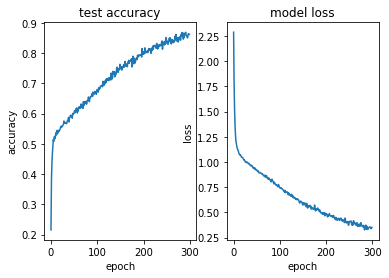

red test
eveluate loss:1.597883395389118, evaluate acc:0.5568413889432456


In [62]:
###########################################################minmaxscaler성능 뱃
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization,regularizers

class whwinemodel(object):#,node,opt,loss,learn,act
    def __init__(self):
        self.model=Sequential()
    def construct(self):
        self.model.add(BatchNormalization())
        self.model.add(Dense(512,input_dim=11))
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(keras.layers.core.Dropout(0.2))
        self.model.add(Dense(256))
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(Dense(128))
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(Dense(64))
        self.model.add(BatchNormalization())#지워보기
        self.model.add(Activation('relu'))
        self.model.add(Dense(32))#64개인거로 했을떄 성능은 비슷하거나 더 안좋았음 
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(Dense(10,activation='softmax'))#rms,adagrad,adadelta
        sgd=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
        self.model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])#adam,rmsprop각각
    def fit(self):
        self.history=self.model.fit(x_train,y_train,epochs=200,batch_size=256,verbose=1,validation_data=(x_test,y_test))#validationset만드든것 성능 비교
        #128로 했을 때 성능 더 굳 256보다
       # self.history=self.model.train_on_batch(x_train,y_train,sample_weight=128,)
    def printkey(self):
        print(self.history.history.keys())
        
    def figure(self):
        fig=plt.figure()
        ax1=fig.add_subplot(1,2,1)
        plt.plot(self.history.history['acc'])
        plt.title('test accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        ax2=fig.add_subplot(1,2,2)
        plt.plot(self.history.history['loss'])
        #plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()
        
    def evaluate(self):
        score = self.model.evaluate(x_train, y_train, verbose=0)
        print("training")
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
    def test(self):
        score = self.model.evaluate(x_test, y_test, verbose=0)
        print("test")
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
#firstmodel=whwinemodel()
#firstmodel.construct()
#firstmodel.fit()
#firstmodel.figure()
#firstmodel.test()



class redwinemodel(object):#,node,opt,loss,learn,act
    def __init__(self):
        self.model=Sequential()
    def construct(self):
        self.model.add(Dense(256))
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(keras.layers.core.Dropout(0.2))#이거만 냅두기
        self.model.add(Dense(128))#64개인거로 했을떄 성능은 비슷하거나 더 안좋았음 
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(Dense(64))#64개인거로 했을떄 성능은 비슷하거나 더 안좋았음 
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(Dense(32))#64개인거로 했을떄 성능은 비슷하거나 더 안좋았음 
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
      #  self.model.add(Dense(20))
      #  self.model.add(BatchNormalization())
     #   self.model.add(Activation('relu'))
        self.model.add(Dense(10,activation='softmax'))#rms,adagrad,adadelta
        sgd=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)#성능 굳굳...ㄸ
    #    sgd=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-8, decay=0.0)  
        self.model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])#adam,rmsprop각각
    def fit(self):
        self.history=self.model.fit(x_train,y_train,epochs=300,batch_size=256,verbose=1,validation_data=(x_test,y_test))#validationset만드든것 성능 비교
        #128로 했을 때 성능 더 굳 256보다
       # self.history=self.model.train_on_batch(x_train,y_train,sample_weight=128,)
    def printkey(self):
        print(self.history.history.keys())
        
    def figure(self):
        fig=plt.figure()
        ax1=fig.add_subplot(1,2,1)
        plt.plot(self.history.history['acc'])
        plt.title('test accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        ax2=fig.add_subplot(1,2,2)
        plt.plot(self.history.history['loss'])
        #plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()
        
    def evaluate(self):
        score = self.model.evaluate(x_train, y_train, verbose=0)
        print("training")
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
    def test(self):
        score = self.model.evaluate(x_test, y_test, verbose=0)
        print("red test")
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
redmodel=redwinemodel()
redmodel.construct()
redmodel.fit()
redmodel.figure()
redmodel.test()



###########################################################

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


Train on 4548 samples, validate on 1257 samples
Epoch 1/300
4548/4548 [==============================] - 19s 4ms/step - loss: 1.6194 - acc: 0.4464 - val_loss: 1.2206 - val_acc: 0.5473
Epoch 2/300
4548/4548 [==============================] - 1s 222us/step - loss: 1.1299 - acc: 0.5587 - val_loss: 1.0787 - val_acc: 0.5704
Epoch 3/300
4548/4548 [==============================] - 1s 229us/step - loss: 1.0511 - acc: 0.5620 - val_loss: 1.0471 - val_acc: 0.5768
Epoch 4/300
4548/4548 [==============================] - 1s 236us/step - loss: 1.0235 - acc: 0.5697 - val_loss: 1.0232 - val_acc: 0.5990
Epoch 5/300
4548/4548 [==============================] - 1s 243us/step - loss: 0.9939 - acc: 0.5750 - val_loss: 1.0355 - val_acc: 0.5807
Epoch 6/300
4548/4548 [==============================] - 1s 245us/step - loss: 0.9862 - acc: 0.5787 - val_loss: 1.0283 - val_acc: 0.5903
Epoch 7/300
4548/4548 [==============================] - 1s 244us/step - loss: 0.9684 - acc: 0.5840 - val_loss: 1.0336 - val_acc: 0

4548/4548 [==============================] - 2s 331us/step - loss: 0.5992 - acc: 0.7518 - val_loss: 1.1665 - val_acc: 0.6062
Epoch 61/300
4548/4548 [==============================] - 1s 326us/step - loss: 0.5846 - acc: 0.7619 - val_loss: 1.1821 - val_acc: 0.5943
Epoch 62/300
4548/4548 [==============================] - 2s 334us/step - loss: 0.5965 - acc: 0.7476 - val_loss: 1.1358 - val_acc: 0.5935
Epoch 63/300
4548/4548 [==============================] - 2s 333us/step - loss: 0.5746 - acc: 0.7663 - val_loss: 1.1536 - val_acc: 0.5967
Epoch 64/300
4548/4548 [==============================] - 1s 324us/step - loss: 0.5650 - acc: 0.7667 - val_loss: 1.1597 - val_acc: 0.6062
Epoch 65/300
4548/4548 [==============================] - 1s 326us/step - loss: 0.5705 - acc: 0.7737 - val_loss: 1.1418 - val_acc: 0.5895
Epoch 66/300
4548/4548 [==============================] - 1s 325us/step - loss: 0.5740 - acc: 0.7647 - val_loss: 1.1092 - val_acc: 0.6189
Epoch 67/300
4548/4548 [=======================

4548/4548 [==============================] - 1s 317us/step - loss: 0.4457 - acc: 0.8217 - val_loss: 1.3112 - val_acc: 0.6181
Epoch 120/300
4548/4548 [==============================] - 1s 308us/step - loss: 0.4517 - acc: 0.8193 - val_loss: 1.3224 - val_acc: 0.6102
Epoch 121/300
4548/4548 [==============================] - 1s 310us/step - loss: 0.4439 - acc: 0.8199 - val_loss: 1.3758 - val_acc: 0.6245
Epoch 122/300
4548/4548 [==============================] - 1s 318us/step - loss: 0.4618 - acc: 0.8140 - val_loss: 1.3579 - val_acc: 0.6269
Epoch 123/300
4548/4548 [==============================] - 1s 316us/step - loss: 0.4442 - acc: 0.8175 - val_loss: 1.3012 - val_acc: 0.6333
Epoch 124/300
4548/4548 [==============================] - 1s 320us/step - loss: 0.4497 - acc: 0.8155 - val_loss: 1.3586 - val_acc: 0.6070
Epoch 125/300
4548/4548 [==============================] - 1s 322us/step - loss: 0.4370 - acc: 0.8173 - val_loss: 1.3053 - val_acc: 0.6333
Epoch 126/300
4548/4548 [================

4548/4548 [==============================] - 1s 309us/step - loss: 0.3728 - acc: 0.8542 - val_loss: 1.4567 - val_acc: 0.6500
Epoch 179/300
4548/4548 [==============================] - 1s 313us/step - loss: 0.3841 - acc: 0.8463 - val_loss: 1.4592 - val_acc: 0.6309
Epoch 180/300
4548/4548 [==============================] - 1s 320us/step - loss: 0.3709 - acc: 0.8522 - val_loss: 1.4600 - val_acc: 0.6364
Epoch 181/300
4548/4548 [==============================] - 2s 337us/step - loss: 0.3630 - acc: 0.8586 - val_loss: 1.4506 - val_acc: 0.6396
Epoch 182/300
4548/4548 [==============================] - 2s 340us/step - loss: 0.3916 - acc: 0.8461 - val_loss: 1.4357 - val_acc: 0.6317
Epoch 183/300
4548/4548 [==============================] - 1s 323us/step - loss: 0.4248 - acc: 0.8300 - val_loss: 1.4951 - val_acc: 0.6388
Epoch 184/300
4548/4548 [==============================] - 1s 326us/step - loss: 0.3965 - acc: 0.8439 - val_loss: 1.4896 - val_acc: 0.6285
Epoch 185/300
4548/4548 [================

4548/4548 [==============================] - 1s 320us/step - loss: 0.3363 - acc: 0.8709 - val_loss: 1.5382 - val_acc: 0.6412
Epoch 238/300
4548/4548 [==============================] - 1s 321us/step - loss: 0.3335 - acc: 0.8652 - val_loss: 1.5594 - val_acc: 0.6436
Epoch 239/300
4548/4548 [==============================] - 1s 327us/step - loss: 0.3272 - acc: 0.8661 - val_loss: 1.5213 - val_acc: 0.6428
Epoch 240/300
4548/4548 [==============================] - 1s 324us/step - loss: 0.3518 - acc: 0.8588 - val_loss: 1.5599 - val_acc: 0.6460
Epoch 241/300
4548/4548 [==============================] - 1s 317us/step - loss: 0.3460 - acc: 0.8639 - val_loss: 1.5311 - val_acc: 0.6452
Epoch 242/300
4548/4548 [==============================] - 1s 319us/step - loss: 0.3461 - acc: 0.8617 - val_loss: 1.5416 - val_acc: 0.6364
Epoch 243/300
4548/4548 [==============================] - 1s 320us/step - loss: 0.3411 - acc: 0.8639 - val_loss: 1.5390 - val_acc: 0.6396
Epoch 244/300
4548/4548 [================

4548/4548 [==============================] - 1s 321us/step - loss: 0.3156 - acc: 0.8716 - val_loss: 1.6474 - val_acc: 0.6333
Epoch 297/300
4548/4548 [==============================] - 1s 315us/step - loss: 0.3151 - acc: 0.8766 - val_loss: 1.6354 - val_acc: 0.6340
Epoch 298/300
4548/4548 [==============================] - 1s 313us/step - loss: 0.3160 - acc: 0.8764 - val_loss: 1.6650 - val_acc: 0.6333
Epoch 299/300
4548/4548 [==============================] - 1s 316us/step - loss: 0.3120 - acc: 0.8764 - val_loss: 1.6618 - val_acc: 0.6380
Epoch 300/300
4548/4548 [==============================] - 1s 323us/step - loss: 0.3002 - acc: 0.8795 - val_loss: 1.6576 - val_acc: 0.6277


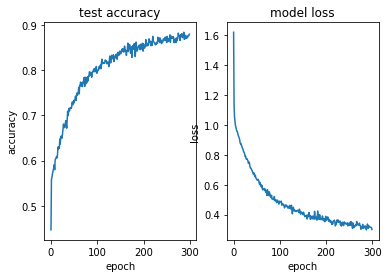

test
eveluate loss:1.657555634575224, evaluate acc:0.62768496439015


In [63]:
##########################################################
data=white_wine.append(red_wine)
xt_train, yt_train, xt_test, yt_test = generate_data(data, 0.7)
class wrwinemodel(object):#,node,opt,loss,learn,act
    def __init__(self):
        self.model=Sequential()
    def construct(self):
        self.model.add(BatchNormalization())
        self.model.add(Dense(256,activation='relu',input_dim=11))
        self.model.add(BatchNormalization())
        self.model.add(Activation('relu'))
        self.model.add(Dense(128))
        self.model.add(keras.layers.core.Dropout(0.2))
        self.model.add(Dense(64,activation='relu'))
        self.model.add(BatchNormalization())
        self.model.add(Dense(32,activation='relu'))
        self.model.add(Dense(10,activation='softmax'))#rms,adagrad,adadelta
        sgd=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)#성능 굳굳...ㄸ
        self.model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])#adam,rmsprop각각
    def fit(self):
        self.history=self.model.fit(xt_train,yt_train,epochs=300,batch_size=128,verbose=1,validation_data=(xt_test,yt_test))#validationset만드든것 성능 비교
        #128로 했을 때 성능 더 굳 256보다
       # self.history=self.model.train_on_batch(x_train,y_train,sample_weight=128,)
    def printkey(self):
        print(self.history.history.keys())
        
    def figure(self):
        fig=plt.figure()
        ax1=fig.add_subplot(1,2,1)
        plt.plot(self.history.history['acc'])
        plt.title('test accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        ax2=fig.add_subplot(1,2,2)
        plt.plot(self.history.history['loss'])
        #plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()
        
    def evaluate(self):
        score = self.model.evaluate(xt_train, yt_train, verbose=0)
        print("training")
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
    def test(self):
        score = self.model.evaluate(xt_test, yt_test, verbose=0)
        print("test")
        print("eveluate loss:{}, evaluate acc:{}".format(score[0],score[1]))
        
wrmodel=wrwinemodel()
wrmodel.construct()
wrmodel.fit()
wrmodel.figure()
#firstmodel.evaluate()
wrmodel.test()

###########################################################